In [1]:
import numpy as np
import pandas as pd
#from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_selection import SelectFromModel
from sklearn.datasets import load_iris

iris = load_iris()

C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
list (iris.target_names)

['setosa', 'versicolor', 'virginica']

In [3]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
X = iris.data
Y = iris.target

In [5]:
print(Y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=7)

#model = XGBClassifier()
#model.fit(X_train, y_train)
#y_pred = model.predict(X_test)
#predictions = [round(value) for value in y_pred]
#accuracy = accuracy_score(y_test, predictions)
#report = classification_report(y_test, predictions)
#print("Accuracy: %.2f%%" % (accuracy * 100.0))
#print(report)


In [7]:
### Вместо XGB повторить с  LightGBM https://lightgbm.readthedocs.io/en/latest/Python-Intro.html
### Построить гистограммы на matplotlib всех 4х параметров

In [10]:
model2 = LGBMClassifier()
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)
predictions2 = [round(value) for value in y_pred2]
accuracy2 = accuracy_score(y_test, predictions2)
report2 = classification_report(y_test, predictions2)
print("Accuracy: %.2f%%" % (accuracy2 * 100.0))
print(report2)

Accuracy: 86.67%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.83      0.83      0.83        12
           2       0.82      0.82      0.82        11

    accuracy                           0.87        30
   macro avg       0.88      0.88      0.88        30
weighted avg       0.87      0.87      0.87        30



(array([ 5.,  0.,  0.,  0.,  0.,  0., 29.,  0.,  0.,  0.,  0.,  0.,  7.,
         0.,  0.,  0.,  0.,  0.,  7.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
         0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  7.,  0.,  0.,  0.,  0.,  0.,  3.,  0.,  0.,
         0.,  0.,  0.,  5.,  0.,  0.,  0.,  0.,  0.,  0., 13.,  0.,  0.,
         0.,  0.,  0.,  8.,  0.,  0.,  0.,  0.,  0., 12.,  0.,  0.,  0.,
         0.,  0.,  4.,  0.,  0.,  0.,  0.,  0.,  2.,  0.,  0.,  0.,  0.,
         0.,  0., 12.,  0.,  0.,  0.,  0.,  0.,  5.,  0.,  0.,  0.,  0.,
         0.,  6.,  0.,  0.,  0.,  0.,  0.,  0.,  6.,  0.,  0.,  0.,  0.,
         0.,  3.,  0.,  0.,  0.,  0.,  0.,  8.,  0.,  0.,  0.,  0.,  0.,
         3.,  0.,  0.,  0.,  0.,  0.,  3.]),
 array([0.1  , 0.116, 0.132, 0.148, 0.164, 0.18 , 0.196, 0.212, 0.228,
        0.244, 0.26 , 0.276, 0.292, 0.308, 0.324, 0.34 , 0.356, 0.372,
        0.

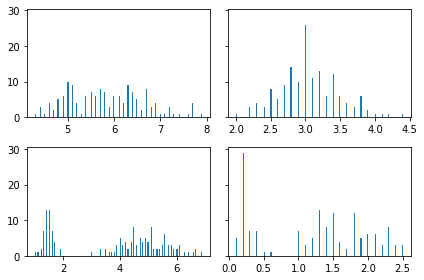

In [55]:
#Histograms
%matplotlib inline
fig, axs = plt.subplots(2, 2, sharey=True, tight_layout=True)
#data=iris['feature_names']
dataFrame = pd.DataFrame(data= np.c_[iris['data'], iris['target']], columns= iris['feature_names'] + ['target_names'])
#plt.hist(data, bins=10)

axs[0][0].hist(dataFrame['sepal length (cm)'], bins=len(dataFrame['sepal length (cm)']))
axs[0][1].hist(dataFrame['sepal width (cm)'], bins=len(dataFrame['sepal width (cm)']))
axs[1][0].hist(dataFrame['petal length (cm)'], bins=len(dataFrame['petal length (cm)']))
axs[1][1].hist(dataFrame['petal width (cm)'], bins=len(dataFrame['petal width (cm)']))